# Part I - US 2008 Flights Exploration
## by Sarah Akinkunmi

## Introduction
> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, for year 2008.


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# loading data into pandas dataframe
flight_details = pd.read_csv("2008.csv")
flight_details

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,2008,4,17,4,1025.0,1025,1234.0,1237,DL,1207,...,5.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389213,2008,4,17,4,1319.0,1320,1527.0,1524,DL,1208,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389214,2008,4,17,4,1335.0,1335,1556.0,1553,DL,1209,...,7.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389215,2008,4,17,4,1933.0,1935,2140.0,2141,DL,1210,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [3]:
# checking the structure of the data
flight_details.shape

(2389217, 29)

In [4]:
# checking for datatypes and missing values
flight_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [5]:
# observing the first 15 columns of the dataset
flight_details.iloc[0:5, : 17]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,N240WN,68.0,70.0,55.0,16.0,18.0,HOU
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,N523SW,82.0,85.0,71.0,2.0,5.0,HOU
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,N280WN,87.0,85.0,71.0,-4.0,-6.0,HOU
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,N308SA,120.0,130.0,108.0,-2.0,8.0,HOU
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,N462WN,123.0,130.0,107.0,16.0,23.0,HOU


Issues to be corrected
- Combining `Year`, `Month` and `DayofMonth` columns into one
- Removing unnecessary columns
- Dropping duplicate rows, if any

In [6]:
# Saving a copy of the dataset
flight_dets = flight_details.copy()

Combining `Year`, `Month` and `DayofMonth` columns into `Date`

In [7]:
# checking the months to ensure the numbers are between 1 - 12
flight_dets['Month'].unique()

array([1, 2, 3, 4], dtype=int64)

> We should note here that there are only 4 months in the data (January to April)

In [8]:
# checking the days to ensure the numbers are between 1 - 31
flight_dets['DayofMonth'].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  2,  1],
      dtype=int64)

In [9]:
# converting the variables to strings
flight_dets['Year'] = flight_dets['Year'].astype(str)
flight_dets['Month'] = flight_dets['Month'].astype(str)
flight_dets['DayofMonth'] = flight_dets['DayofMonth'].astype(str)

In [10]:
# checking to ensure data integrity
flight_dets.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [11]:
# making the date column
flight_dets['Date'] = pd.to_datetime(flight_dets['Year'] + '-' + flight_dets['Month'] + '-' + flight_dets['DayofMonth'])

In [12]:
# inserting it into the first column of the dataframe
first_col = flight_dets.pop('Date')
flight_dets.insert(0, 'Date', first_col)

In [13]:
# checking to ensure code worked as expected
flight_dets.head()


,Date,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,2008,1,3,4,1343.0,1325,1451.0,1435,WN,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008-01-03,2008,1,3,4,1125.0,1120,1247.0,1245,WN,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008-01-03,2008,1,3,4,2009.0,2015,2136.0,2140,WN,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008-01-03,2008,1,3,4,903.0,855,1203.0,1205,WN,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008-01-03,2008,1,3,4,1423.0,1400,1726.0,1710,WN,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


Removing unnecessary columns -`Year`, `Month` and `DayofMonth` and `DayOfWeek`, `TaxiIn`, `TaxiOut`

In [14]:
flight_dets.drop(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'TaxiIn', 'TaxiOut'], axis=1, inplace=True)

In [15]:
# checking to ensure changes
flight_dets.head()

,Date,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,1343.0,1325,1451.0,1435,WN,588,N240WN,68.0,70.0,...,LIT,393,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008-01-03,1125.0,1120,1247.0,1245,WN,1343,N523SW,82.0,85.0,...,MAF,441,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008-01-03,2009.0,2015,2136.0,2140,WN,3841,N280WN,87.0,85.0,...,MAF,441,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008-01-03,903.0,855,1203.0,1205,WN,3,N308SA,120.0,130.0,...,MCO,848,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008-01-03,1423.0,1400,1726.0,1710,WN,25,N462WN,123.0,130.0,...,MCO,848,0,NaN,0,16.0,0.0,0.0,0.0,0.0


Dropping duplicate rows

In [16]:
flight_dets.drop_duplicates(inplace=True)

In [17]:
# checking to see if any records were dropped
flight_dets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2389213 entries, 0 to 2389216
Data columns (total 24 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   DepTime            float64       
 2   CRSDepTime         int64         
 3   ArrTime            float64       
 4   CRSArrTime         int64         
 5   UniqueCarrier      object        
 6   FlightNum          int64         
 7   TailNum            object        
 8   ActualElapsedTime  float64       
 9   CRSElapsedTime     float64       
 10  AirTime            float64       
 11  ArrDelay           float64       
 12  DepDelay           float64       
 13  Origin             object        
 14  Dest               object        
 15  Distance           int64         
 16  Cancelled          int64         
 17  CancellationCode   object        
 18  Diverted           int64         
 19  CarrierDelay       float64       
 20  WeatherDelay       float

In [18]:
# loading the airports file
airport = pd.read_csv("airports.csv")
airport.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [19]:
# loading the unique carriers and airlines file
carriers = pd.read_csv("carriers.csv")
carriers

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
...,...,...
1486,ZW,Air Wisconsin Airlines Corp
1487,ZX,Air Georgian
1488,ZX (1),Airbc Ltd.
1489,ZY,Atlantic Gulf Airlines


In [20]:
# loading the plane data file
airplane_data = pd.read_csv("plane-data.csv")
airplane_data.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# loading the variable description file
vars_description = pd.read_csv("variable-descriptions.csv")
vars_description

,Variable descriptions,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Name,Description
2,1.0,Year,1987-2008
3,2.0,Month,12-Jan
4,3.0,DayofMonth,31-Jan
5,4.0,DayOfWeek,1 (Monday) - 7 (Sunday)
6,5.0,DepTime,"actual departure time (local, hhmm)"
7,6.0,CRSDepTime,"scheduled departure time (local, hhmm)"
8,7.0,ArrTime,"actual arrival time (local, hhmm)"
9,8.0,CRSArrTime,"scheduled arrival time (local, hhmm)"


### What is the structure of your dataset?

> The dataset consists of 29 features and more than 2 million records. More information about the features (columns) definition can be found in the `vars_description` dataframe.

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in exploring features that affect delayed flights 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features I think will help support my investigation are the 
- the causes of delays - `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`. I expect Weather to be a major cause
- the `Distance` covered
- if a particular airline is associated with more delays (`UniqueCarrier`)
- differences between the actual elapsed and scheduled elapse times, `ActualElapsedTime` and  `CSRElapsedTime` which indicate the delay time in minutes


## Univariate Exploration

In [22]:
# since blue is the most common brand colour for airlines in the usa (https://apex.aero/articles/logochromatic-airline-brand-colors-region/), that would be the main colour
main_color = sb.color_palette()[0]

## Question: What are the most common states flights depart from? 

## Visualization

In [23]:
# selecting the top 10 cities to reduce noise
order = flight_dets['Origin'].value_counts()[:10].index

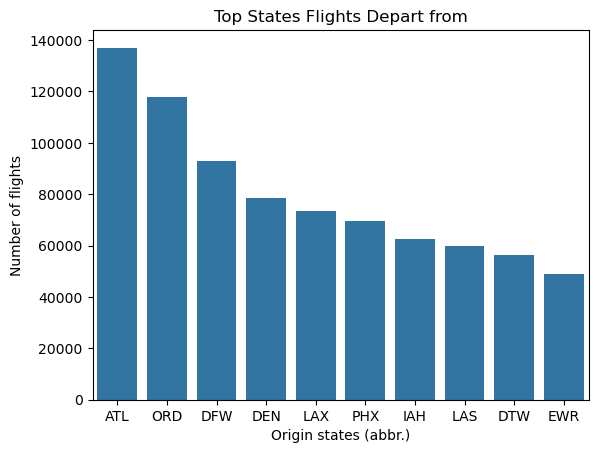

In [24]:
# plotting the data
sb.countplot(data = flight_dets, x = 'Origin', color = main_color, order = order);
plt.title("Top States Flights Depart from")
plt.xlabel("Origin states (abbr.)")
plt.ylabel("Number of flights");

## Observation

> Atlanta is the state most flights depart from

## Question: What are the most common states flights head to?

## Visualization

In [25]:
# selecting the top 10 cities
order = flight_dets['Dest'].value_counts()[:10].index

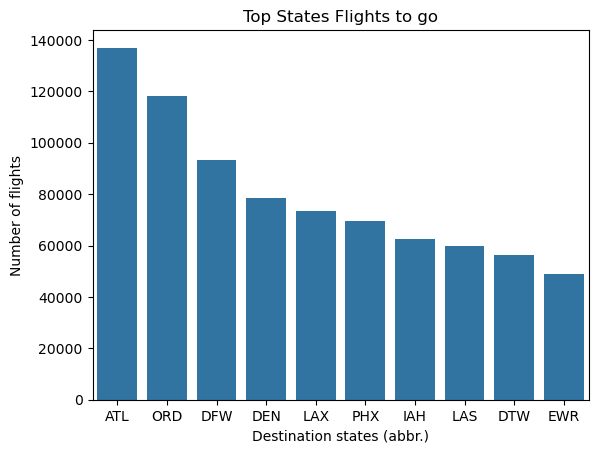

In [26]:
# plotting the data
sb.countplot(data = flight_dets, x = 'Dest', color = main_color, order = order);
plt.title("Top States Flights to go")
plt.xlabel("Destination states (abbr.)")
plt.ylabel("Number of flights");

## Observation

> Atlanta is the state most flights return to. Looking back at the visualization of where most flights move from, the top 10 cities are the same as this.

## Question: What are the most common airlines for the 2008 flights?

## Visualization

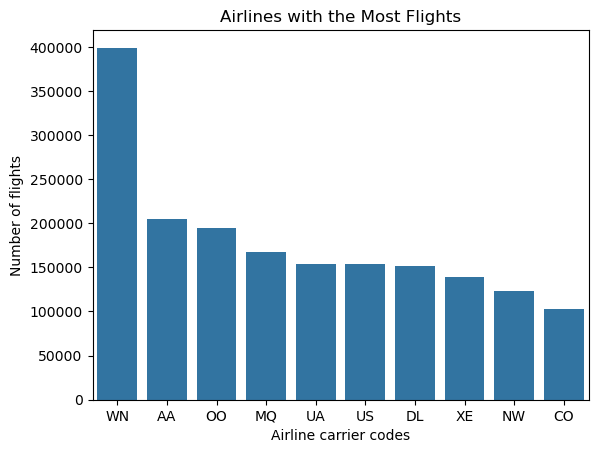

In [27]:
# selecting the top 10 airlines and plotting the data
order = flight_dets['UniqueCarrier'].value_counts()[:10].index
sb.countplot(data = flight_dets, x = 'UniqueCarrier', color = main_color, order = order);
plt.title("Airlines with the Most Flights")
plt.xlabel("Airline carrier codes")
plt.ylabel("Number of flights");

## Observation
> Southwest Airlines Co. is our most used Airline. American Airlines Inc. comes in second

## Question: What month(s) have the most flights?

## Visualization

In [28]:
# Extracting the months from the date variable
flight_dets['Month'] = flight_dets['Date'].dt.month_name()

In [29]:
# Converting month to categorical variable to ensure order
ordered_months = pd.api.types.CategoricalDtype(categories=flight_dets['Month'].unique(), ordered=True)
flight_dets['Month'] = flight_dets['Month'].astype(ordered_months)

In [30]:
# ensuring that the months are corresponding with the numbers
flight_dets['Month'].unique()

['January', 'February', 'March', 'April']
Categories (4, object): ['January' < 'February' < 'March' < 'April']

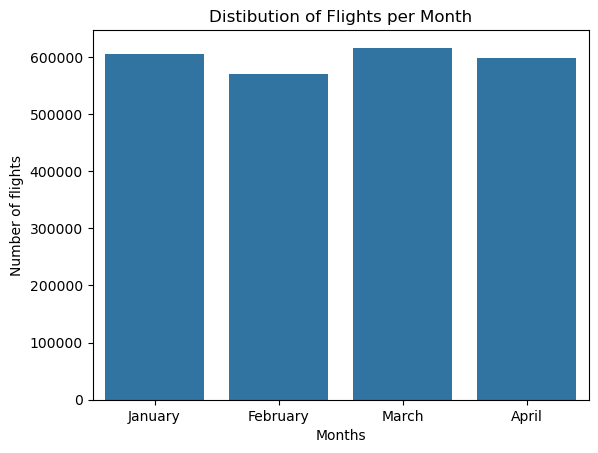

In [31]:
# plotting the data
sb.countplot(data = flight_dets, x = 'Month', color = main_color);
plt.title("Distibution of Flights per Month");
plt.xlabel("Months");
plt.ylabel("Number of flights");

## Observation: 
> March has the most flights, perhaps due to Easter which held on March 23. To confirm if this is true, I'll plot the distribution of flights in March

## Question: Do most of the flights in March occur around Easter (March 16 - March 25)? 

## Visualization

In [32]:
# making a separate dataframe with the days in March
march = flight_dets[(flight_dets['Date'] >= '2008-03-01') & (flight_dets['Date'] < '2008-04-01')]

In [33]:
# sorting the dataframe by the date column
march.sort_values(by='Date')

,Date,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Month
1628055,2008-03-01,607.0,603,729.0,737,NW,1425,N677MC,82.0,94.0,...,369,0,NaN,0,NaN,NaN,NaN,NaN,NaN,March
1298291,2008-03-01,1247.0,1255,1409.0,1407,XE,2304,N14938,82.0,72.0,...,376,0,NaN,0,NaN,NaN,NaN,NaN,NaN,March
1430092,2008-03-01,1732.0,1735,1914.0,1929,UA,1427,N460UA,102.0,114.0,...,602,0,NaN,0,NaN,NaN,NaN,NaN,NaN,March
1704429,2008-03-01,1454.0,1455,1751.0,1800,AA,2033,N4WYAA,237.0,245.0,...,1391,0,NaN,0,NaN,NaN,NaN,NaN,NaN,March
1601382,2008-03-01,1146.0,1035,1326.0,1240,MQ,4854,N712AE,100.0,125.0,...,501,0,NaN,0,0.0,0.0,0.0,0.0,46.0,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603005,2008-03-31,1141.0,1115,1408.0,1233,NW,115,N528US,267.0,198.0,...,1276,0,NaN,0,23.0,0.0,69.0,0.0,3.0,March
1559490,2008-03-31,1716.0,1720,1804.0,1811,HA,360,N477HA,48.0,51.0,...,216,0,NaN,0,NaN,NaN,NaN,NaN,NaN,March
1267365,2008-03-31,601.0,600,846.0,835,WN,121,N408WN,105.0,95.0,...,588,0,NaN,0,NaN,NaN,NaN,NaN,NaN,March
1267373,2008-03-31,2101.0,2010,2316.0,2230,WN,214,N791SW,75.0,80.0,...,448,0,NaN,0,13.0,0.0,0.0,0.0,33.0,March


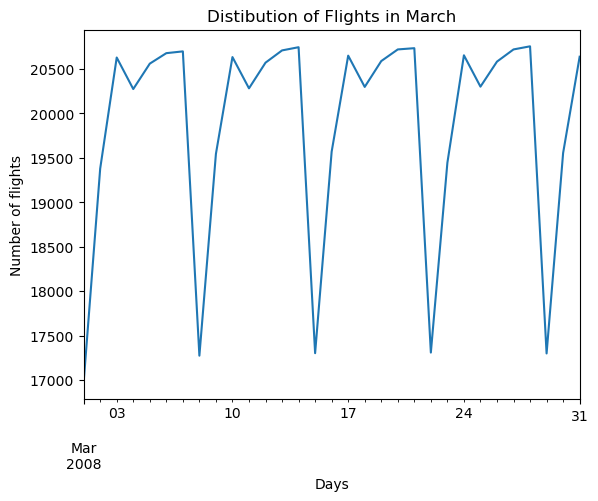

In [34]:
# plotting the data
march.groupby(march['Date'])['UniqueCarrier'].size().plot();
plt.title("Distibution of Flights in March")
plt.xlabel("Days")
plt.ylabel("Number of flights");

## Observation: 
> The distribution is fairly the same throughout the month

## Question: Were the flights over more longer distances than short distances?

## Visualization

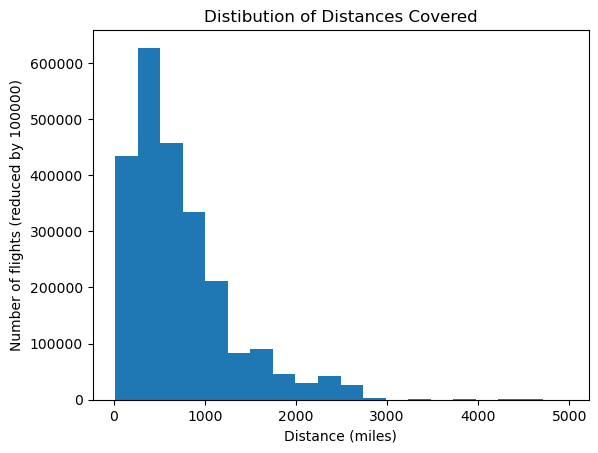

In [35]:
# plotting the data
plt.hist(flight_dets['Distance'], bins=20, color=main_color);
plt.title("Distibution of Distances Covered")
plt.xlabel("Distance (miles)")
plt.ylabel("Number of flights (reduced by 100000)");

## Observation
> Most flights covered short distances (< 1000 miles)

## Question: Did the 2008 flights have more short delays than long delays?

## Visualization

In [36]:
# creating new variable calculating the delay time in minutes
flight_dets['delay_time'] = flight_dets['ActualElapsedTime'] - flight_dets['CRSElapsedTime']

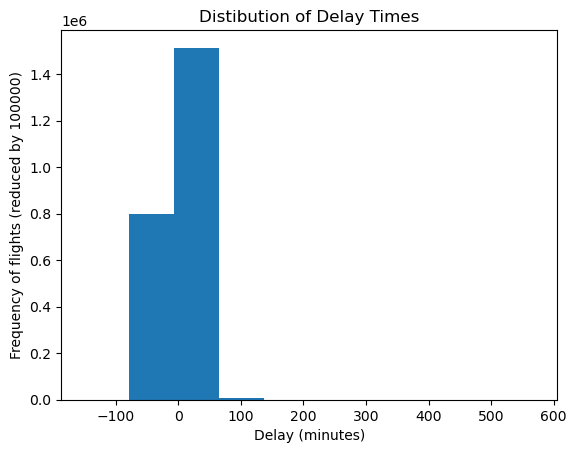

In [37]:
# plotting the data
plt.hist(flight_dets['delay_time'], bins=10, color=main_color);
plt.title("Distibution of Delay Times")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency of flights (reduced by 100000)");

In [38]:
# checking the maximum and minimum values to help create our bins
flight_dets['delay_time'].describe()

count    2.319117e+06
mean    -1.115588e+00
std      1.420628e+01
min     -1.510000e+02
25%     -9.000000e+00
50%     -3.000000e+00
75%      5.000000e+00
max      5.700000e+02
Name: delay_time, dtype: float64

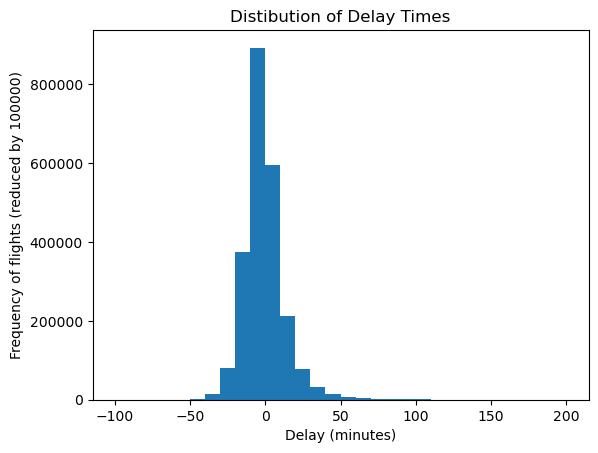

In [39]:
# zooming in on the peak
bins = np.arange(-100, 200 + 10, 10)
plt.hist(flight_dets['delay_time'], bins=bins, color=main_color);
plt.title("Distibution of Delay Times")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency of flights (reduced by 100000)");

## Observation
> More than 100,000 flights were earlier than expected and long delays over 50 minutes are less frequent

## Question: What type of delay caused the most delays?

## Visualization

In [40]:
# statistical description of the numerical variables
flight_dets.describe()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,delay_time
count,2.324771e+06,2.389213e+06,2.319117e+06,2.389213e+06,2.389213e+06,2.319117e+06,2.388806e+06,2.319117e+06,2.319117e+06,2.324771e+06,2.389213e+06,2.389213e+06,2.389213e+06,584581.000000,584581.000000,584581.000000,584581.000000,584581.000000,2.319117e+06
mean,1.340018e+03,1.329992e+03,1.485835e+03,1.496744e+03,2.213890e+03,1.286188e+02,1.293775e+02,1.051016e+02,1.027355e+01,1.143634e+01,7.261584e+02,2.697206e-02,2.366470e-03,15.752934,2.938253,16.158442,0.080459,20.976782,-1.115588e+00
std,4.802717e+02,4.657833e+02,5.081295e+02,4.845238e+02,1.951393e+03,7.025303e+01,6.948246e+01,6.766801e+01,3.963431e+01,3.653231e+01,5.571763e+02,1.620018e-01,4.858879e-02,40.035534,19.166694,30.534190,1.742582,38.617200,1.420628e+01
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-9.100000e+01,-9.200000e+01,1.700000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.510000e+02
25%,9.300000e+02,9.270000e+02,1.110000e+03,1.115000e+03,6.050000e+02,7.800000e+01,8.000000e+01,5.600000e+01,-9.000000e+00,-4.000000e+00,3.250000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000e+00
50%,1.330000e+03,1.325000e+03,1.516000e+03,1.520000e+03,1.544000e+03,1.110000e+02,1.110000e+02,8.700000e+01,0.000000e+00,0.000000e+00,5.830000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,5.000000,0.000000,0.000000,-3.000000e+00
75%,1.733000e+03,1.720000e+03,1.914000e+03,1.910000e+03,3.631000e+03,1.600000e+02,1.600000e+02,1.340000e+02,1.500000e+01,1.100000e+01,9.570000e+02,0.000000e+00,0.000000e+00,16.000000,0.000000,20.000000,0.000000,27.000000,5.000000e+00
max,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.741000e+03,9.050000e+02,1.435000e+03,8.860000e+02,2.461000e+03,2.467000e+03,4.962000e+03,1.000000e+00,1.000000e+00,2436.000000,1148.000000,1357.000000,392.000000,1254.000000,5.700000e+02


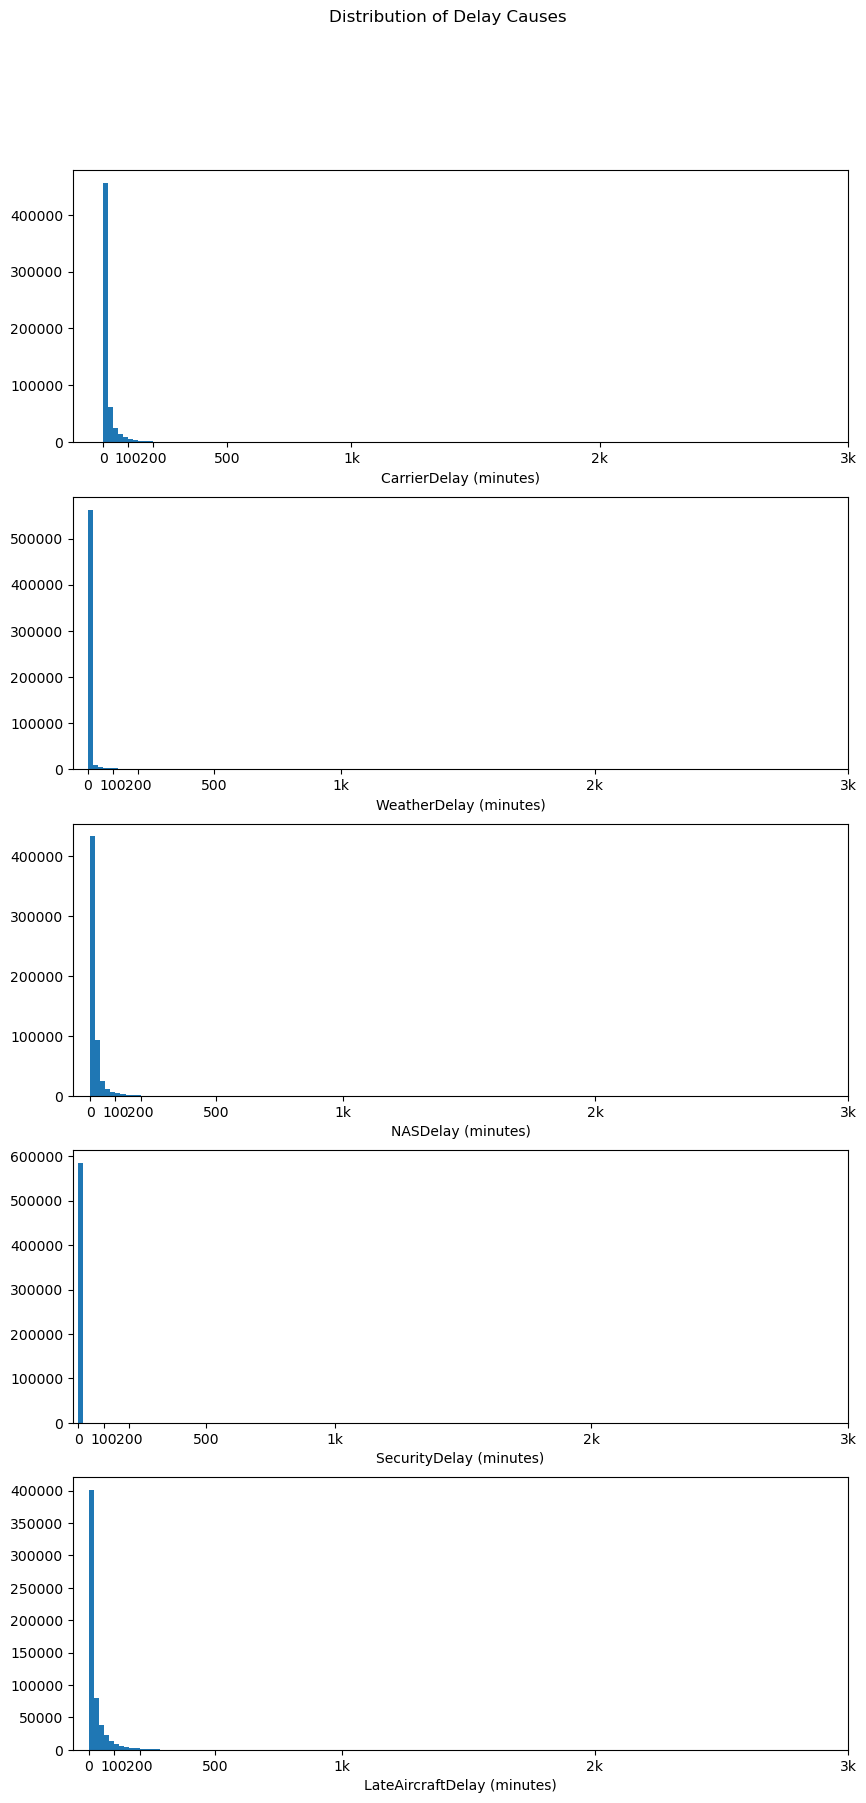

In [41]:
# plotting the distribution of each delay cause
fig, ax = plt.subplots(nrows=5, figsize = [10, 20])
variables = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
ticks = [0, 100, 200, 500, 1000, 2000, 3000]

for _ in range(len(variables)):
  var = variables[_]
  bins = np.arange(min(flight_dets[var]), max(flight_dets[var]) + 20, 20)
  ax[_].hist(data = flight_dets, x = var, bins = bins)
  ax[_].set_xlabel('{} (minutes)'.format(var))
  ax[_].set_xticks(ticks, [0, 100, 200, 500, '1k', '2k', '3k'])

plt.subplots_adjust(top=0.9)
plt.suptitle('Distribution of Delay Causes')
plt.show()

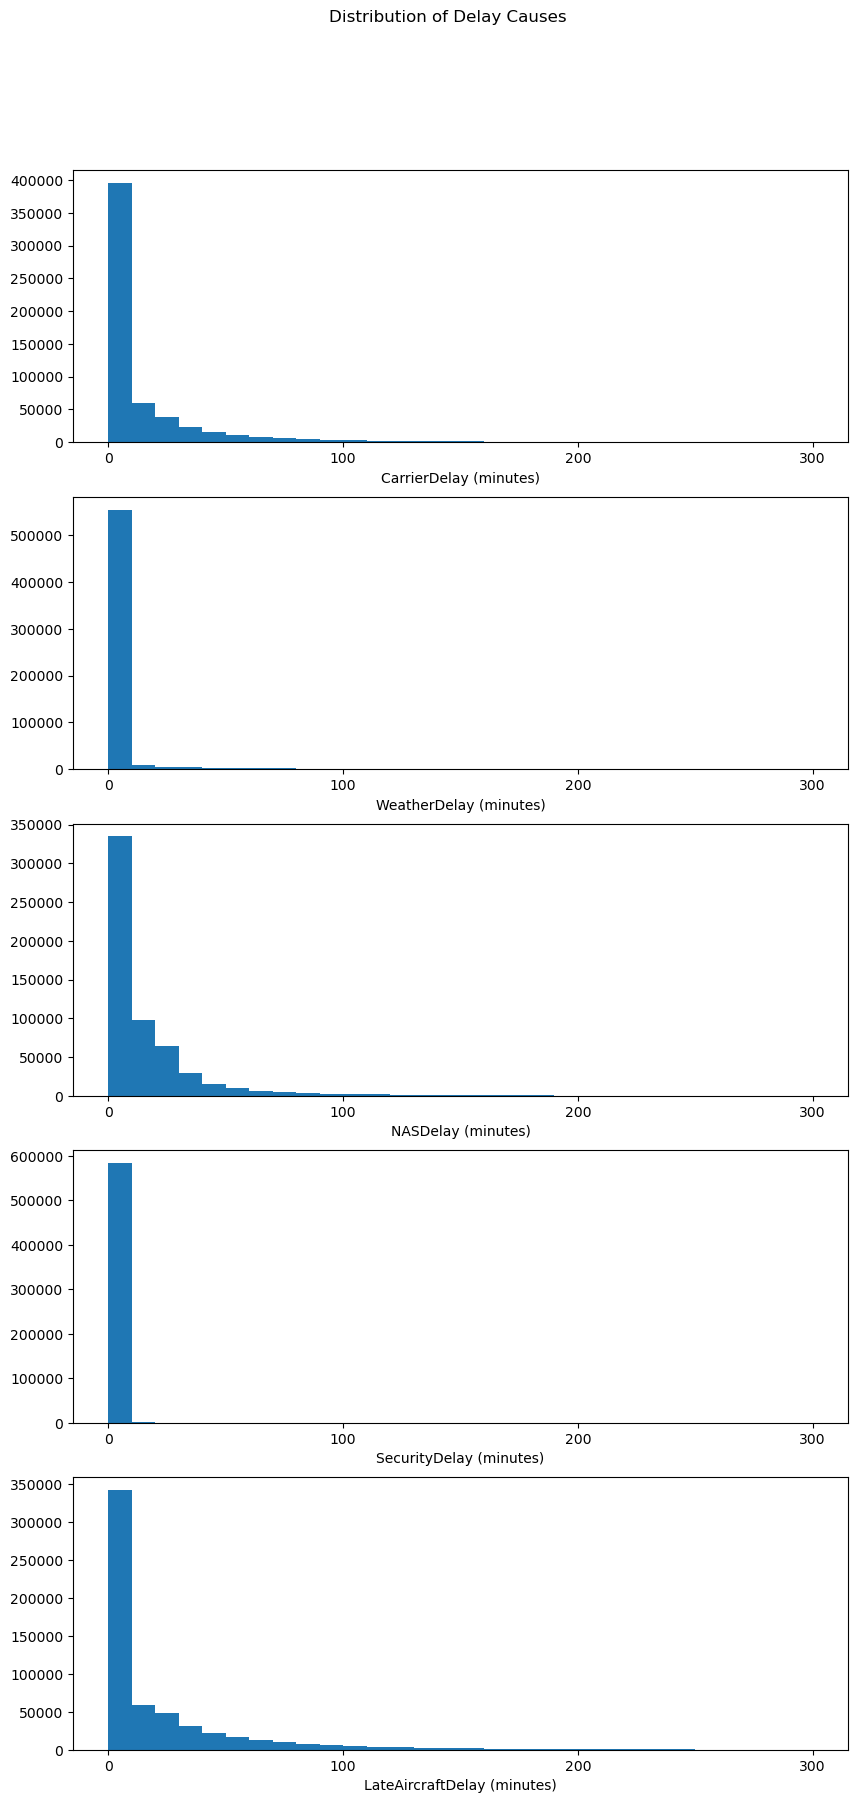

In [42]:
# zooming in on the distributions
fig, ax = plt.subplots(nrows=5, figsize = [10, 20])
variables = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
ticks = [0, 100, 200, 300]

for _ in range(len(variables)):
  var = variables[_]
  bins = np.arange(min(flight_dets[var]), 300 + 10, 10)
  ax[_].hist(data = flight_dets, x = var, bins = bins)
  ax[_].set_xlabel('{} (minutes)'.format(var))
  ax[_].set_xticks(ticks)

plt.subplots_adjust(top=0.9)
plt.suptitle('Distribution of Delay Causes')
plt.show()

## Observation
> Security delays are the least common cause of delays  
> Late aircrafts are the most common delay causes followed by the National Airport System delays

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Unexpectedly I noticed
> - The flights covered more short distances (< 1000 miles)
> - Most of the flights were in fact earlier than expected
> - Late aircrafts were the most common causes of delays.  

> I only needed to perform scaling transforms to zoom into the distributions of the numerical variables

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the numerical variables, `Distance`, `delay_time` and the delay causes, I noticed a number of outliers. Hence, I focused on the rest.

## Bivariate Exploration



## Question: What months have the most delays?

## Visualization

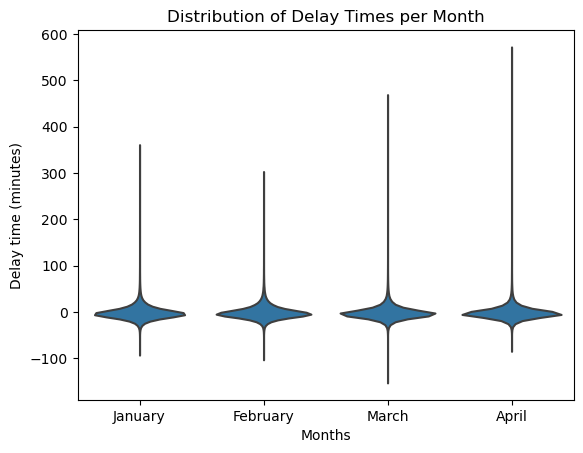

In [43]:
# plotting the data
sb.violinplot(data=flight_dets, x='Month', y='delay_time', color=main_color, inner=None);
plt.title('Distribution of Delay Times per Month')
plt.xlabel('Months')
plt.ylabel('Delay time (minutes)');

## Observation

Most of the flights in all the months are either on-time or earlier than expected. However, April has the most delays

## Question: Are some flights associated with more delays 

## Visualization

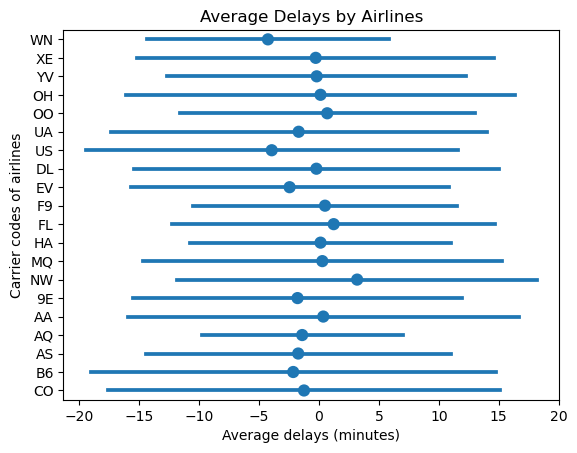

In [44]:
# plotting the data
sb.pointplot(data=flight_dets, x='delay_time', y='UniqueCarrier', color=main_color, errorbar='sd', linestyles="");
plt.title("Average Delays by Airlines")
plt.xlabel("Average delays (minutes)")
plt.ylabel("Carrier codes of airlines");

## Observation

Northwest Airlines Inc. (NW) have the most average delays, followed by AirTran Airways Corporation (FL), Frontier Airlines Inc. (F9).

## Question: Do longer distances lead to longer delays?

## Visualization

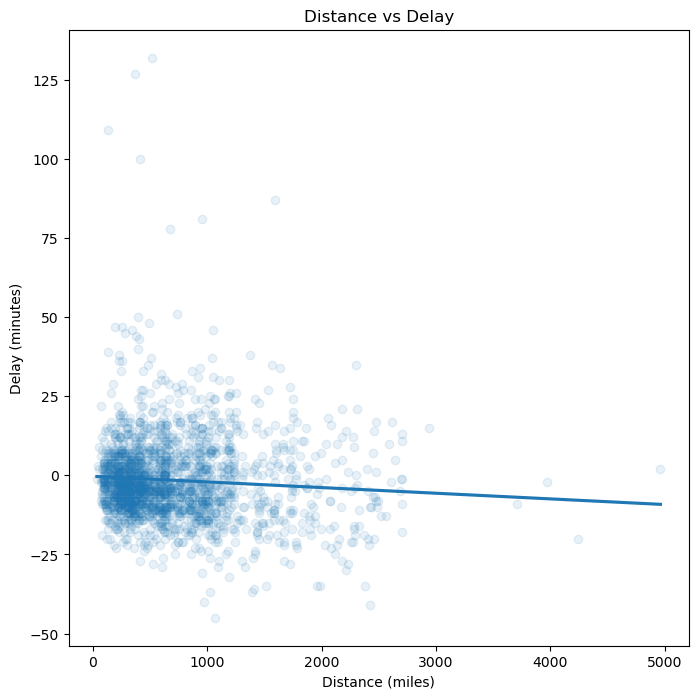

In [45]:
# taking a sample of the data to reduce memory usage and plotting the data
sample = np.random.choice(flight_dets.shape[0], 2000, replace=False)
flight_samp = flight_dets.loc[sample, :]

plt.figure(figsize=[8,8])
sb.regplot(data=flight_samp, x='Distance', y='delay_time', x_jitter=0.3, scatter_kws={'alpha':1/10}, ci=None);
plt.title('Distance vs Delay')
plt.xlabel('Distance (miles)')
plt.ylabel("Delay (minutes)");
plt.show()

## Observation

There is a slight negative correlation between delay and distance.

## Question: Which delay causes caused longer delays?

## Visualization

In [46]:
# creating a list of the delay causes variables
variables = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

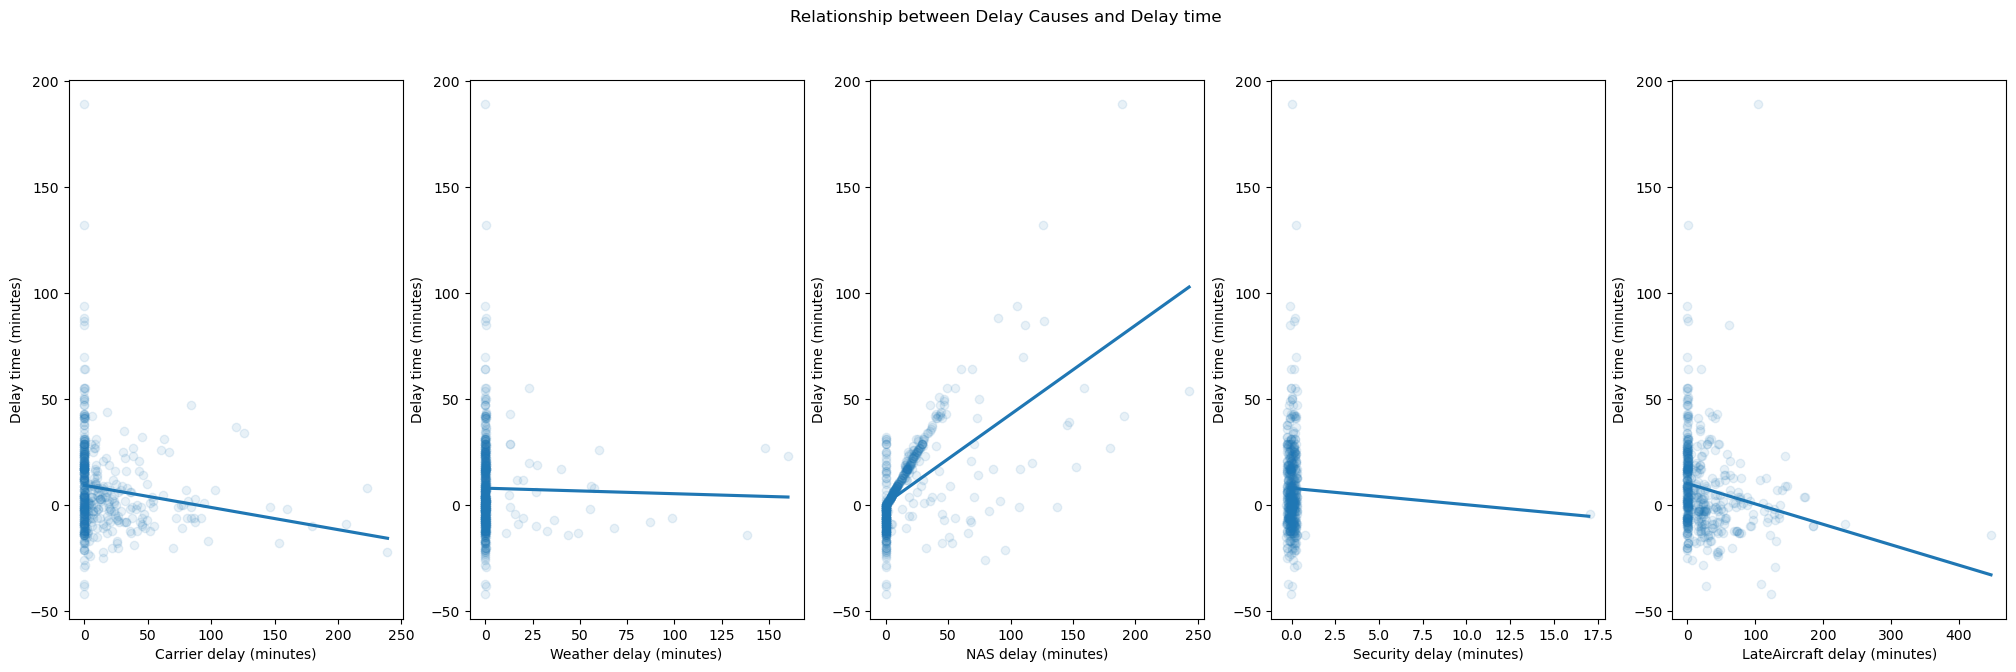

In [47]:
# sample 2000 flights so plots load faster
sample = np.random.choice(flight_dets.shape[0], 2000, replace=False)
flight_samp = flight_dets.loc[sample, :]

x = 1
plt.figure(figsize=[25, 7])
for _ in variables:
  plt.subplot(1, 5, x)
  sb.regplot(data=flight_samp, x=_, y='delay_time', x_jitter=0.3, scatter_kws={'alpha':1/10}, ci=None);
  x += 1
  plt.xlabel(_[:-5] + ' delay (minutes)')
  plt.ylabel('Delay time (minutes)')

plt.suptitle('Relationship between Delay Causes and Delay time');


## Observation
> Delay time shows a strong positive correlation with NASDelay but a strong negative correlation with Carrier and Late Aircraft delays. There is a weak positive correlation between Delay time and Security delays and a moderately strong correlation between delay time and Weather delays.  

> NAS Delays are within the control of the National Airspace System and may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. Delays that occur after Actual Gate Out are usually attributed to the NAS and are also reported through OPSNET. (https://aspm.faa.gov/aspmhelp/index/Types_of_Delay.html). Therefore, it is more likely for these to cause long delays depending on the severity of the issue.

## Question: Do older planes experience longer delays?

In [48]:
# merging the flight and plane data dataframes
plane_and_dets = flight_dets.merge(airplane_data, how='inner', left_on='TailNum', right_on='tailnum')

In [49]:
# checking the first 5 rows of the data
plane_and_dets.head()

,Date,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,delay_time,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,2008-01-03,1343.0,1325,1451.0,1435,WN,588,N240WN,68.0,70.0,...,-2.0,N240WN,Corporation,BOEING,07/11/2006,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2006
1,2008-01-03,1758.0,1800,1854.0,1900,WN,41,N240WN,56.0,60.0,...,-4.0,N240WN,Corporation,BOEING,07/11/2006,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2006
2,2008-01-03,1516.0,1500,1614.0,1605,WN,41,N240WN,58.0,65.0,...,-7.0,N240WN,Corporation,BOEING,07/11/2006,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2006
3,2008-01-03,1921.0,1920,2017.0,2035,WN,41,N240WN,56.0,75.0,...,-19.0,N240WN,Corporation,BOEING,07/11/2006,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2006
4,2008-01-03,617.0,615,743.0,740,WN,588,N240WN,86.0,85.0,...,1.0,N240WN,Corporation,BOEING,07/11/2006,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2006


In [50]:
# dropping unnecessary columns
plane_and_dets.drop(['type', 'manufacturer', 'model', 'status', 'aircraft_type', 'engine_type', 'year'], axis=1, inplace=True)

In [51]:
# checking to ensure the columns were dropped
plane_and_dets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262262 entries, 0 to 2262261
Data columns (total 28 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   DepTime            float64       
 2   CRSDepTime         int64         
 3   ArrTime            float64       
 4   CRSArrTime         int64         
 5   UniqueCarrier      object        
 6   FlightNum          int64         
 7   TailNum            object        
 8   ActualElapsedTime  float64       
 9   CRSElapsedTime     float64       
 10  AirTime            float64       
 11  ArrDelay           float64       
 12  DepDelay           float64       
 13  Origin             object        
 14  Dest               object        
 15  Distance           int64         
 16  Cancelled          int64         
 17  CancellationCode   object        
 18  Diverted           int64         
 19  CarrierDelay       float64       
 20  WeatherDelay       float

In [52]:
# checking for rows with null values
plane_and_dets[plane_and_dets['issue_date'].isna()]


,Date,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Month,delay_time,tailnum,issue_date
130712,2008-01-03,1117.0,1050,1325.0,1325,WN,1636,N321SW,128.0,155.0,...,0,NaN,NaN,NaN,NaN,NaN,January,-27.0,N321SW,NaN
130713,2008-01-03,2051.0,2010,134.0,55,WN,3746,N321SW,163.0,165.0,...,0,17.0,0.0,0.0,0.0,22.0,January,-2.0,N321SW,NaN
130714,2008-01-03,1916.0,1850,2013.0,1950,WN,3746,N321SW,57.0,60.0,...,0,3.0,0.0,0.0,0.0,20.0,January,-3.0,N321SW,NaN
130715,2008-01-03,1534.0,1515,1704.0,1640,WN,3659,N321SW,90.0,85.0,...,0,7.0,0.0,5.0,0.0,12.0,January,5.0,N321SW,NaN
130716,2008-01-03,1732.0,1710,1848.0,1825,WN,3659,N321SW,76.0,75.0,...,0,0.0,0.0,1.0,0.0,22.0,January,1.0,N321SW,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251560,2008-04-22,1322.0,1325,1418.0,1425,AA,1886,N075AA,56.0,60.0,...,0,NaN,NaN,NaN,NaN,NaN,April,-4.0,N075AA,NaN
2251561,2008-04-19,1140.0,1145,1430.0,1430,AA,2217,N075AA,170.0,165.0,...,0,NaN,NaN,NaN,NaN,NaN,April,5.0,N075AA,NaN
2251562,2008-04-28,1144.0,1145,1422.0,1430,AA,2217,N075AA,158.0,165.0,...,0,NaN,NaN,NaN,NaN,NaN,April,-7.0,N075AA,NaN
2251563,2008-04-29,1142.0,1145,1416.0,1430,AA,2217,N075AA,154.0,165.0,...,0,NaN,NaN,NaN,NaN,NaN,April,-11.0,N075AA,NaN


In [53]:
# dropping those rows
plane_and_dets = plane_and_dets.dropna(subset=['issue_date'], how='any')

In [54]:
# removing records where issue date is none
plane_and_dets = plane_and_dets[(plane_and_dets['issue_date'] != 'None') & (plane_and_dets['issue_date'] != '')]

In [55]:
# making issue date datetime
plane_and_dets['issue_date'] = pd.to_datetime(plane_and_dets['issue_date'])

In [56]:
plane_and_dets.head()

,Date,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Month,delay_time,tailnum,issue_date
0,2008-01-03,1343.0,1325,1451.0,1435,WN,588,N240WN,68.0,70.0,...,0,16.0,0.0,0.0,0.0,0.0,January,-2.0,N240WN,2006-07-11
1,2008-01-03,1758.0,1800,1854.0,1900,WN,41,N240WN,56.0,60.0,...,0,NaN,NaN,NaN,NaN,NaN,January,-4.0,N240WN,2006-07-11
2,2008-01-03,1516.0,1500,1614.0,1605,WN,41,N240WN,58.0,65.0,...,0,NaN,NaN,NaN,NaN,NaN,January,-7.0,N240WN,2006-07-11
3,2008-01-03,1921.0,1920,2017.0,2035,WN,41,N240WN,56.0,75.0,...,0,NaN,NaN,NaN,NaN,NaN,January,-19.0,N240WN,2006-07-11
4,2008-01-03,617.0,615,743.0,740,WN,588,N240WN,86.0,85.0,...,0,NaN,NaN,NaN,NaN,NaN,January,1.0,N240WN,2006-07-11


In [57]:
# extracting year from issue date column
plane_and_dets['issue_year'] = plane_and_dets['issue_date'].dt.year

In [58]:
# checking throught
plane_and_dets['issue_year'].unique()

array([2006, 1992, 2007, 1999, 2004, 2005, 1998, 1996, 1997, 1990, 2003,
       1985, 2002, 1993, 2001, 1986, 2000, 1995, 1991, 1994, 1988, 1987,
       2008, 1989, 1984, 1976, 1978, 1977], dtype=int64)

In [59]:
# Converting year to categorical variable to ensure order
ordered_years = pd.api.types.CategoricalDtype(categories=plane_and_dets['issue_year'].unique(), ordered=True)
plane_and_dets['issue_year'] = plane_and_dets['issue_year'].astype(ordered_years)

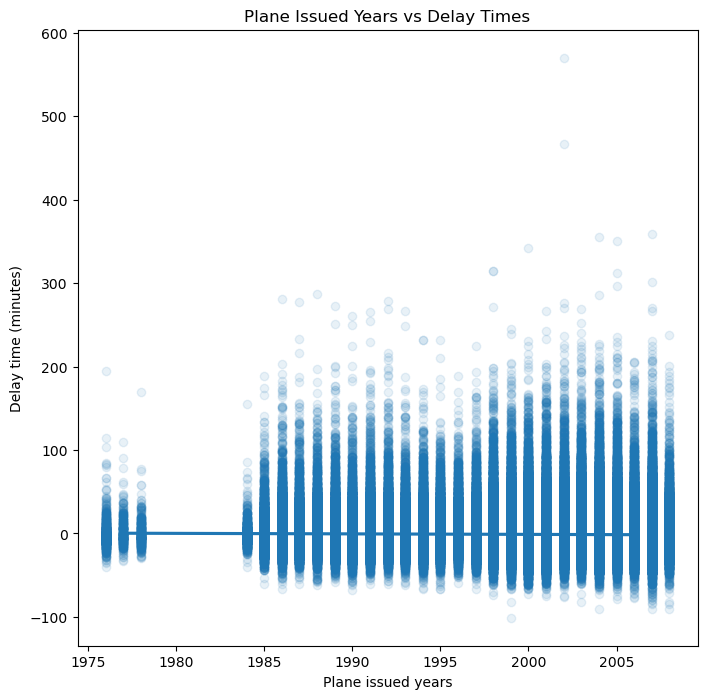

In [60]:
# plotting the data
plt.figure(figsize=[8, 8])
sb.regplot(data=plane_and_dets, x='issue_year', y='delay_time', scatter_kws={'alpha':1/10}, ci=None);
plt.title('Plane Issued Years vs Delay Times')
plt.xlabel('Plane issued years')
plt.ylabel('Delay time (minutes)');

## Observation
> The scatter plot shows that there is little to no correlation between the years and delay time. Therefore, older planes do not cause longer delays.  
> There are no planes issued between 1979 and 1984

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> NAS Delays have a strong positive correlation with delay time  
> Distance has little to no effect on the delay  
> The age of the planes has no effect on delay times

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> April has the longest delay times which is interesting because there are no public holidays in the USA in April, 2008.  
> NorthWest Airlines Inc. have the longest delay times. I will like to investigate further on the relationship between the airplanes ages and delay times 

## Multivariate Exploration


## Question: How do the delay times and NAS delay vary with the most common destinations in each month? 

## Visualization

In [61]:
# picking the top 5 destinations and adding them to a list
order = flight_dets['Dest'].value_counts()[:5].index.tolist()
order

['ATL', 'ORD', 'DFW', 'DEN', 'LAX']

In [62]:
# selecting records with the top destinations
top_dest = flight_dets.loc[flight_dets.apply(lambda x: x.Dest in order, axis=1)]
top_dest

,Date,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Month,delay_time
200,2008-01-03,701.0,700,941.0,955,WN,85,N688SW,100.0,115.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,January,-15.0
201,2008-01-03,1047.0,1030,1328.0,1320,WN,157,N481WN,101.0,110.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,January,-9.0
202,2008-01-03,2232.0,2115,108.0,5,WN,632,N203WN,96.0,110.0,...,0,NaN,0,0.0,0.0,7.0,0.0,56.0,January,-14.0
203,2008-01-03,1512.0,1315,1802.0,1610,WN,706,N491WN,110.0,115.0,...,0,NaN,0,0.0,0.0,0.0,0.0,112.0,January,-5.0
204,2008-01-03,2025.0,1955,2301.0,2245,WN,908,N480WN,96.0,110.0,...,0,NaN,0,7.0,0.0,0.0,0.0,9.0,January,-14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389153,2008-04-17,1021.0,1025,1430.0,1435,DL,1152,N901DA,189.0,190.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,April,-1.0
2389156,2008-04-17,1640.0,1640,1758.0,1810,DL,1154,N903DA,78.0,90.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,April,-12.0
2389160,2008-04-17,1600.0,1540,1719.0,1655,DL,1157,N999DN,79.0,75.0,...,0,NaN,0,10.0,0.0,14.0,0.0,0.0,April,4.0
2389203,2008-04-17,1157.0,1200,1335.0,1337,DL,1199,N993DL,98.0,97.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,April,1.0


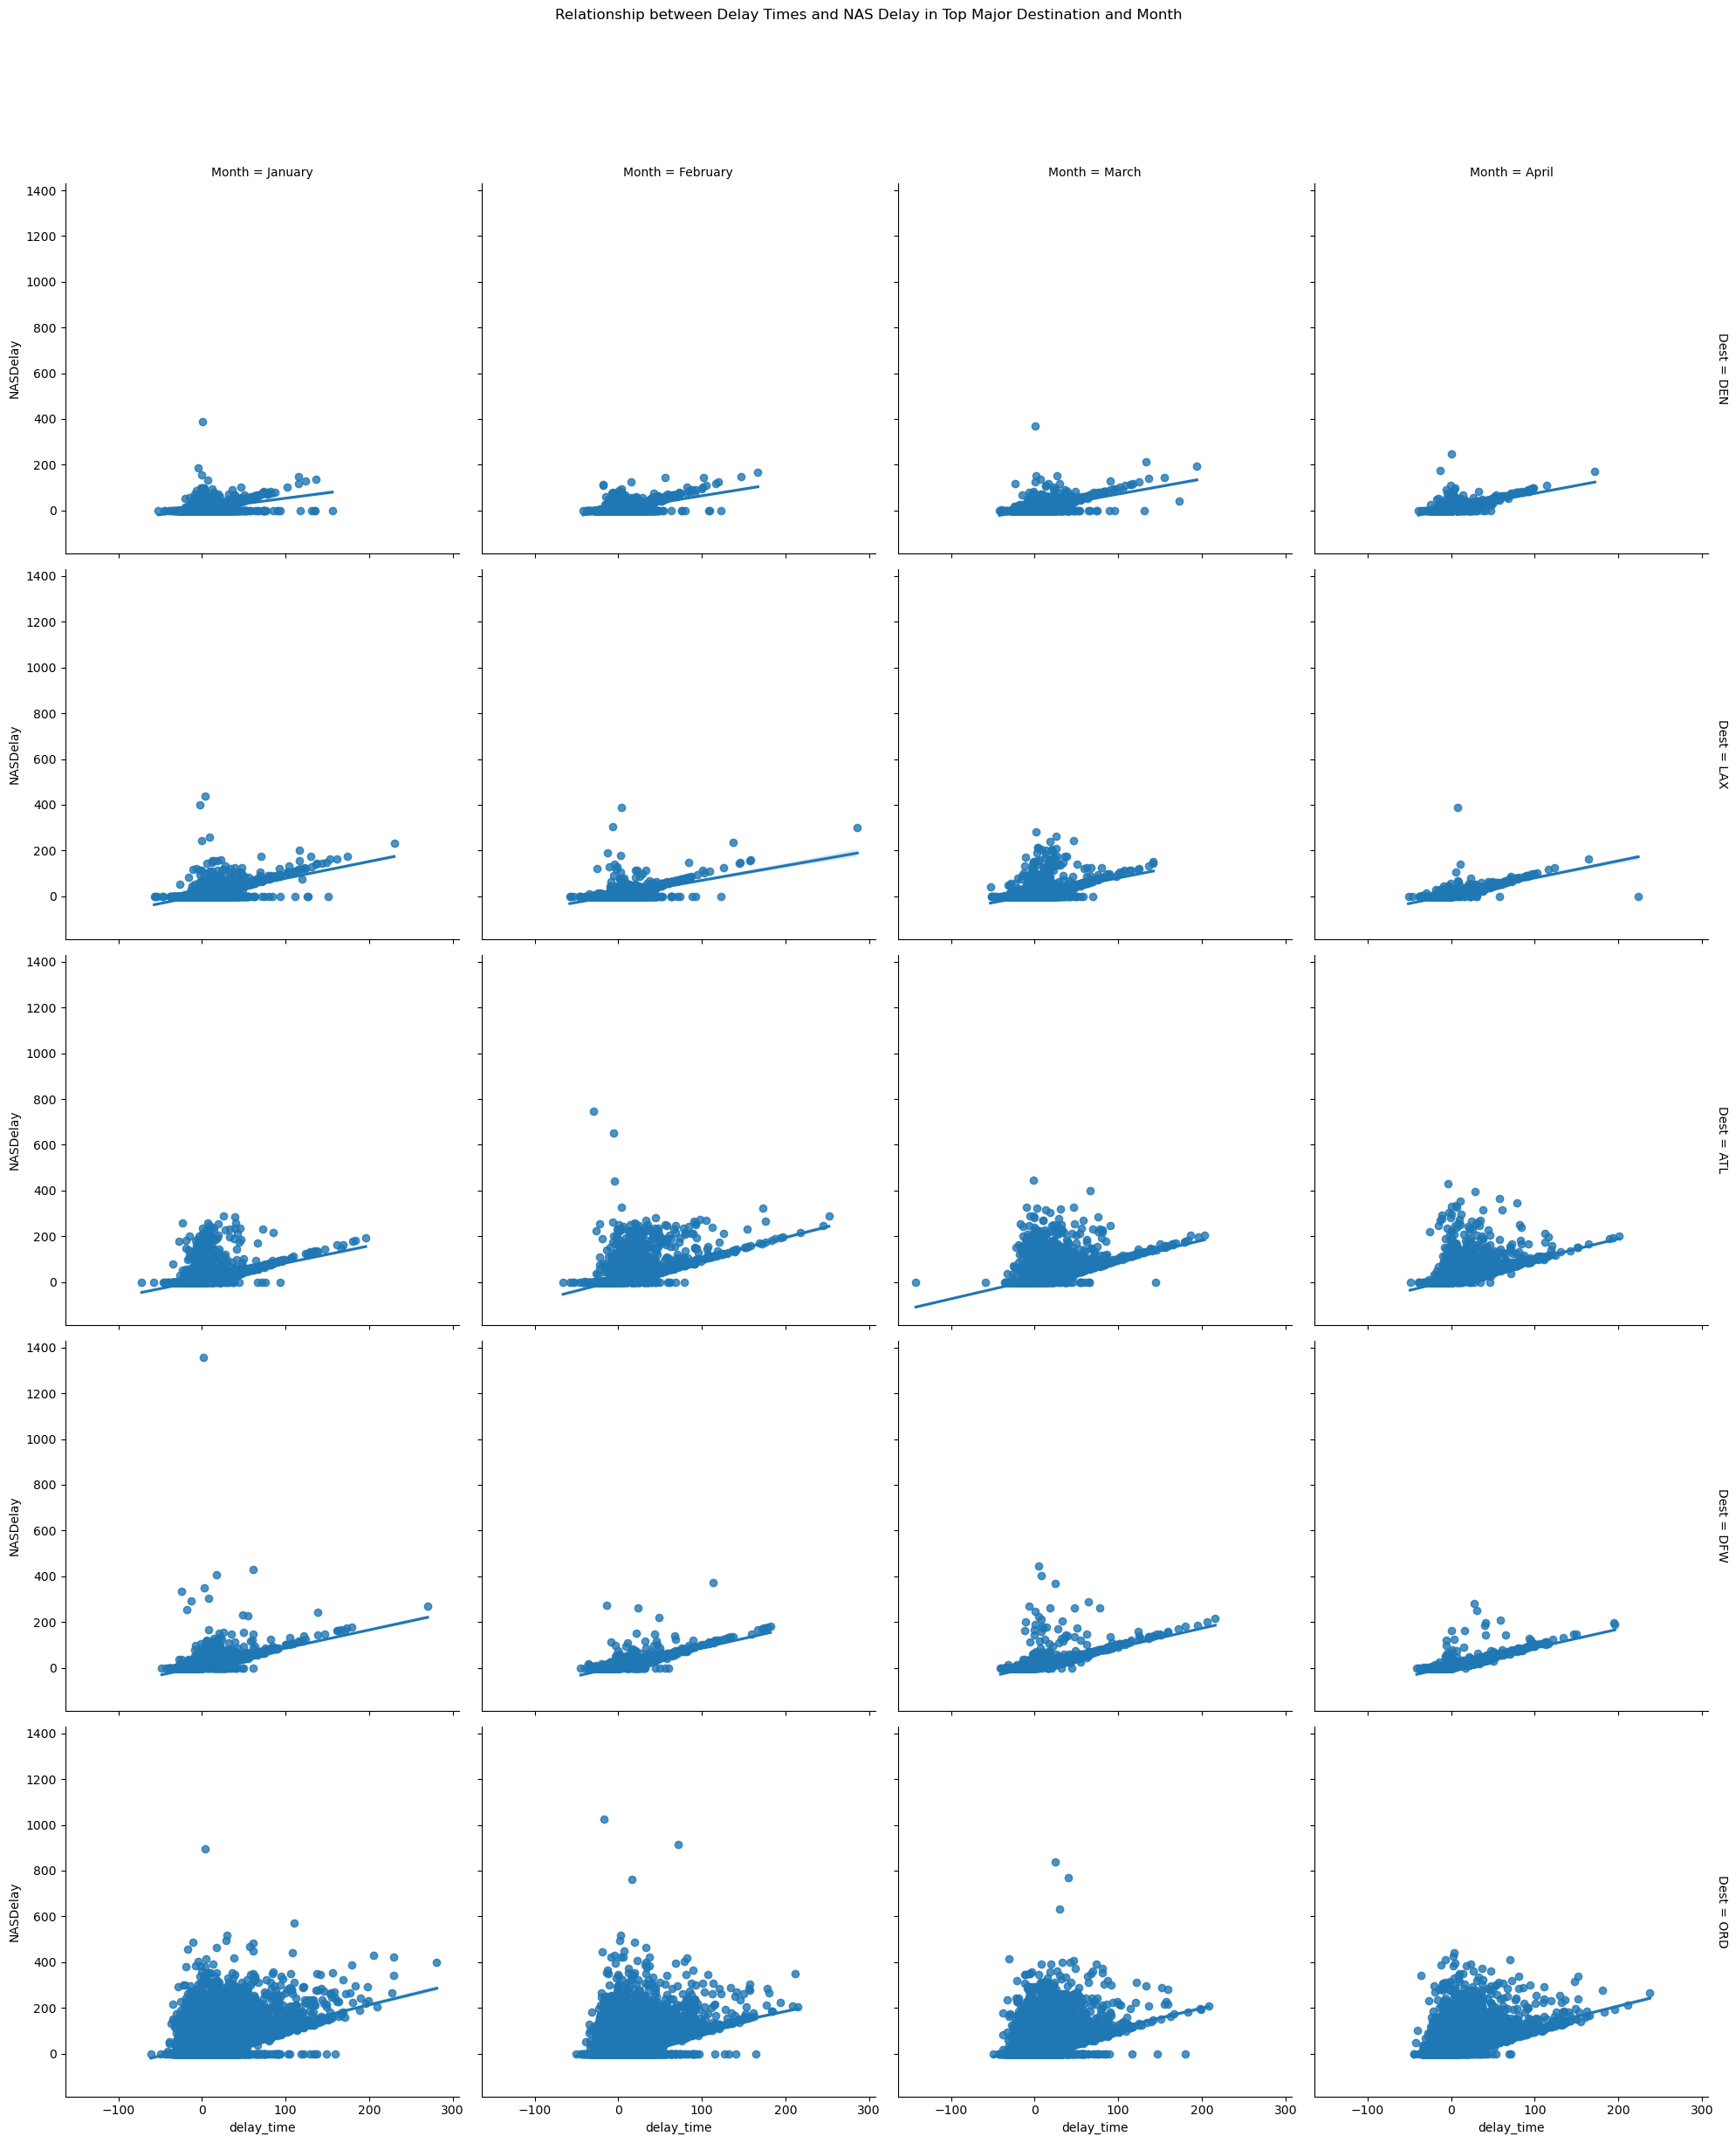

In [63]:
# plotting the data
g = sb.FacetGrid(data = top_dest, row = 'Dest', col = 'Month', height = 5, margin_titles = True)
g.map(sb.regplot, 'delay_time', 'NASDelay');
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Delay Times and NAS Delay in Top Major Destination and Month');

## Observation
> There is a positive correlation between delay time and NAS delay for the top destinations in each month

## Question: How do the delay times and Weather delay vary with the most used airlines in each month?

## Visualization

In [64]:
# picking the top 5 used airlines and adding them to a list
order = flight_dets['UniqueCarrier'].value_counts()[:5].index

In [65]:
# selecting records with the top airlines
top_al = flight_dets.loc[flight_dets.apply(lambda x: x.UniqueCarrier in order, axis=1)]
top_al.head()

,Date,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Month,delay_time
0,2008-01-03,1343.0,1325,1451.0,1435,WN,588,N240WN,68.0,70.0,...,0,NaN,0,16.0,0.0,0.0,0.0,0.0,January,-2.0
1,2008-01-03,1125.0,1120,1247.0,1245,WN,1343,N523SW,82.0,85.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,January,-3.0
2,2008-01-03,2009.0,2015,2136.0,2140,WN,3841,N280WN,87.0,85.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,January,2.0
3,2008-01-03,903.0,855,1203.0,1205,WN,3,N308SA,120.0,130.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,January,-10.0
4,2008-01-03,1423.0,1400,1726.0,1710,WN,25,N462WN,123.0,130.0,...,0,NaN,0,16.0,0.0,0.0,0.0,0.0,January,-7.0


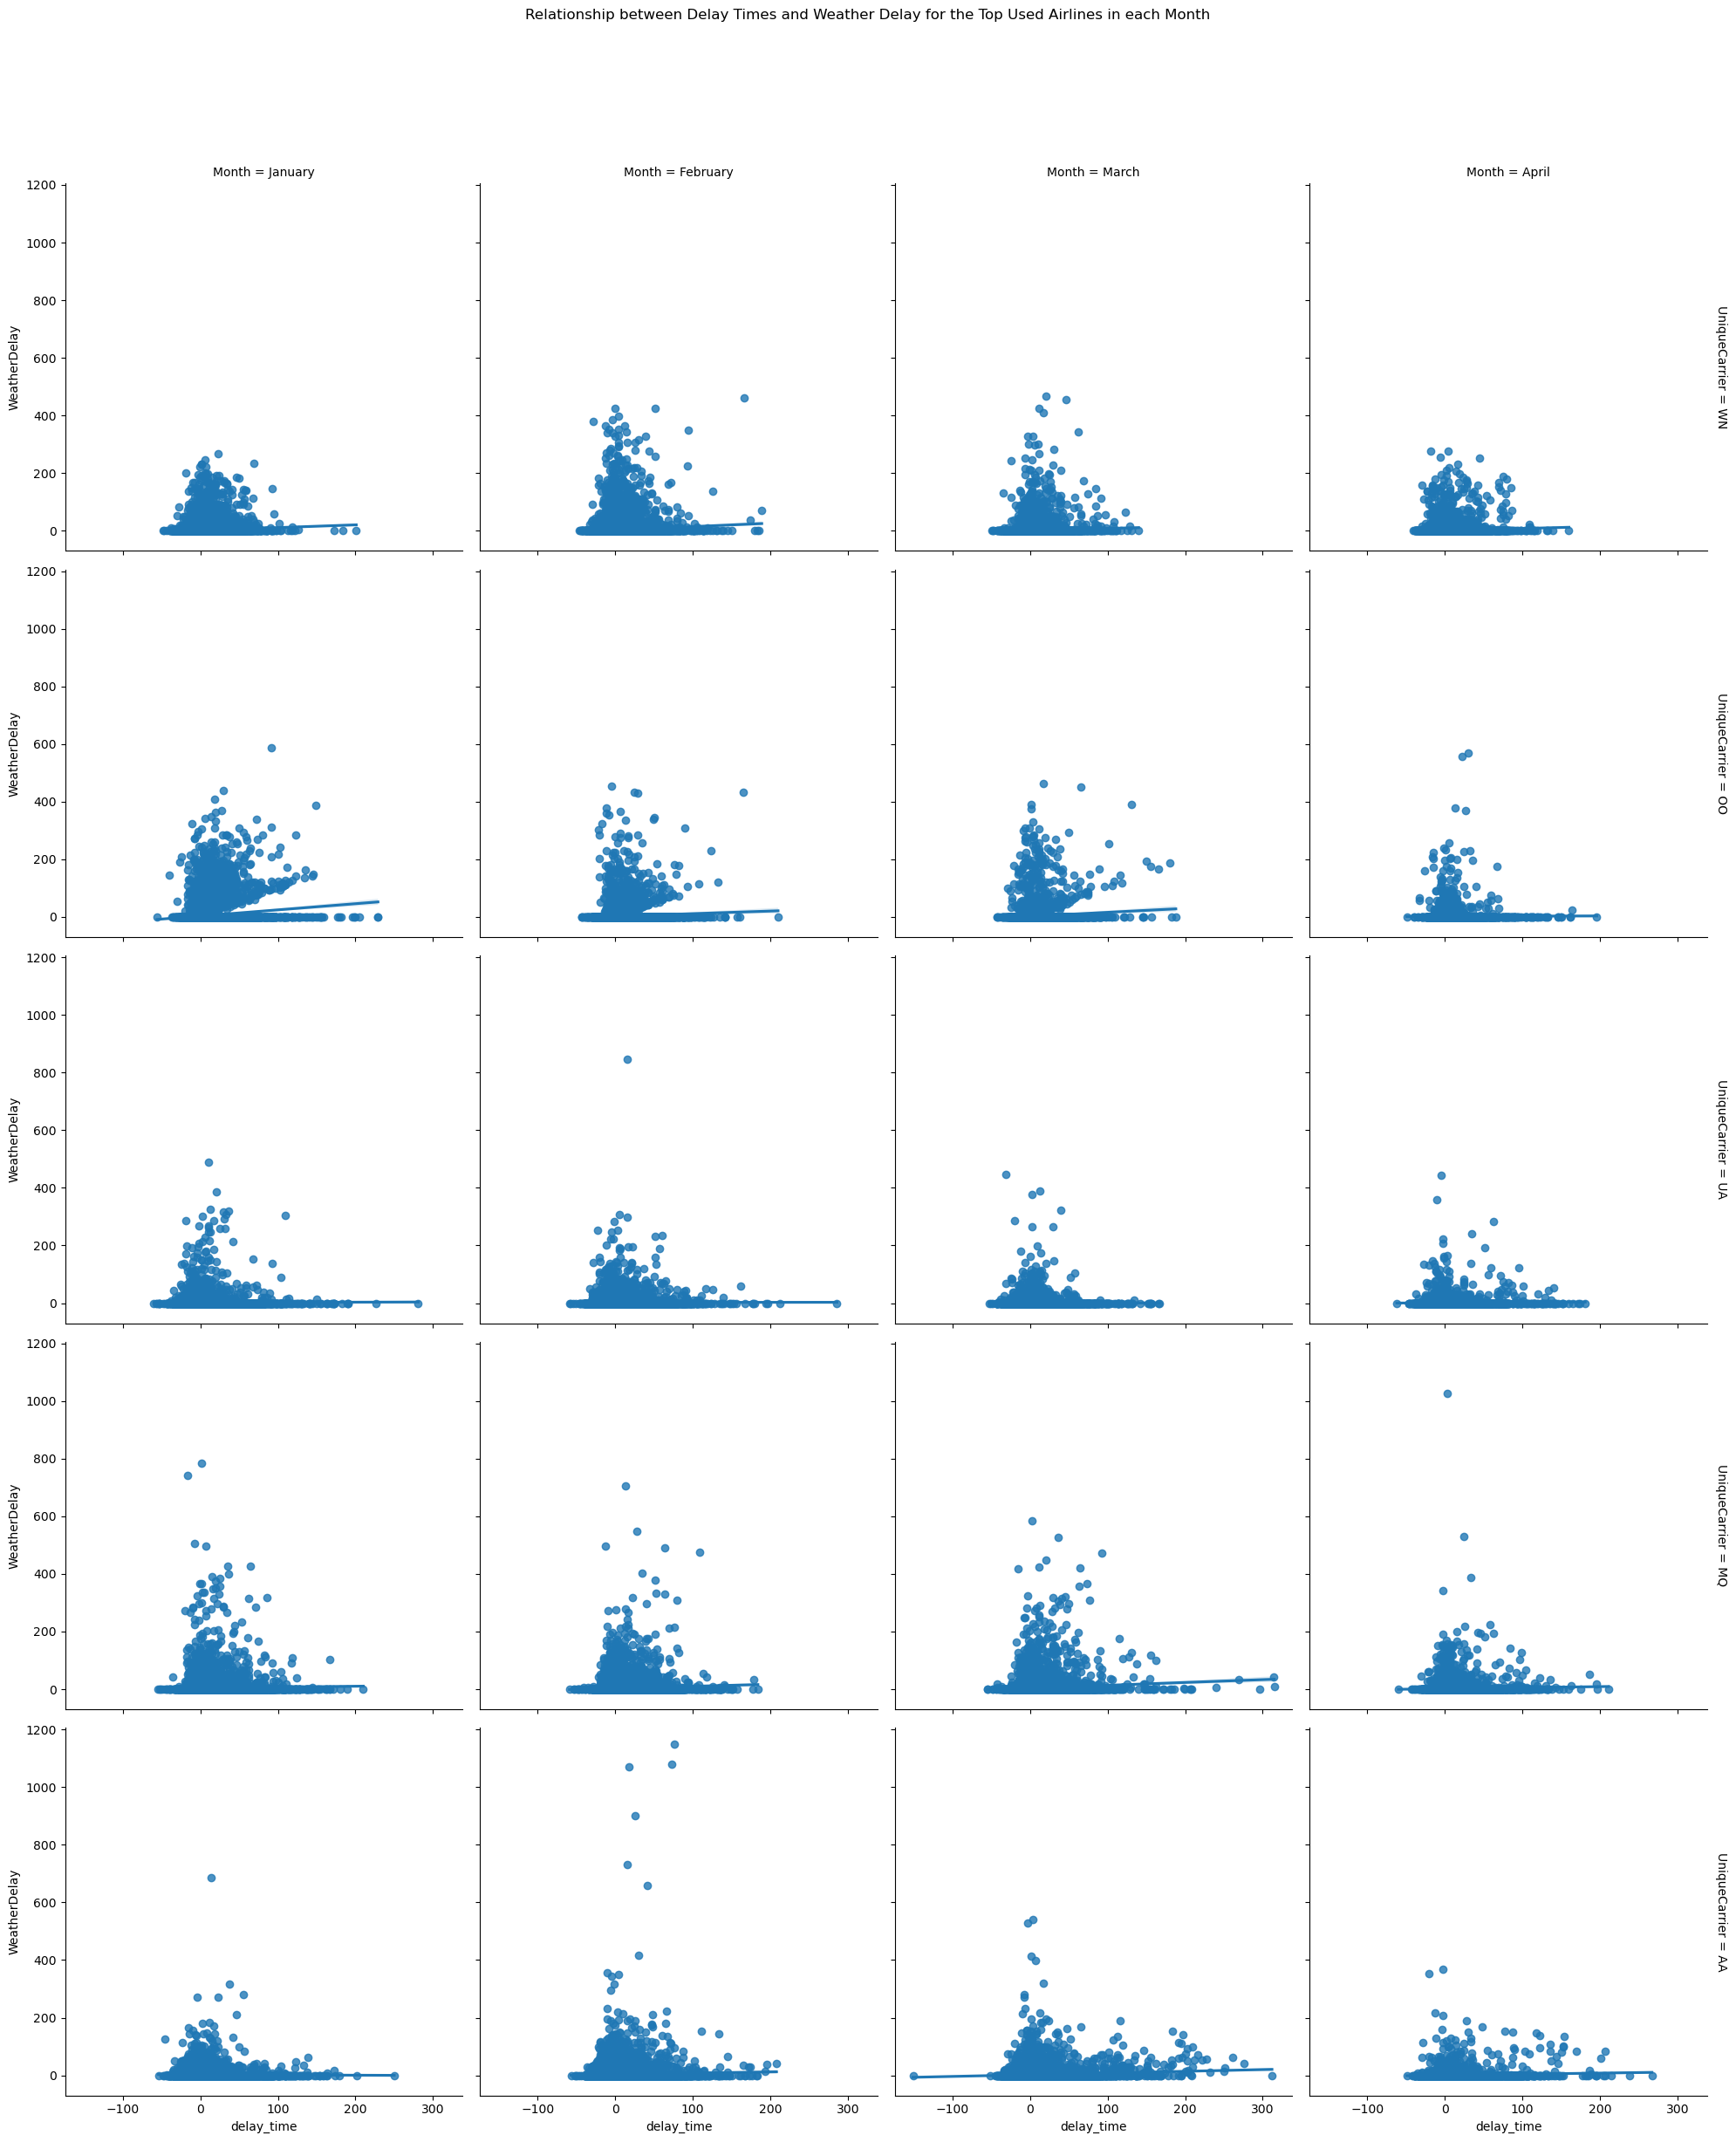

In [66]:
# plotting the data
g = sb.FacetGrid(data = top_al, row = 'UniqueCarrier', col = 'Month', height = 5, margin_titles = True)
g.map(sb.regplot, 'delay_time', 'WeatherDelay');
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Delay Times and Weather Delay for the Top Used Airlines in each Month');

## Observation
> Most of the graphs show no relationship between delay time and Weather delay with few showing a very weak positive correlation.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> After noticing the strong positive relationship delay times have with NAS delay, I wanted to find out if this remained true for all months and in each destination. I found a positive relationship for all variables.  
> With regards to the relationship between delay time and weather delays for each month and top used airlines, there were only no to little positive correlation

### Were there any interesting or surprising interactions between features?

> Yes. It was surprising that the relationship between delay time and weather delay was weak when considering the month and most used airlines since both variables showed a moderately strong relationship alone.

## Conclusions

2008 flights in the USA from January to April were mostly earlier than expected on right on time. The delays were mostly caused by late aircrafts and then National Airspace System (NAS) delays, although we find out that NAS delay have the strongest relationhip with delay times. This flights mostly covered short distances, however, there was no relationship between the distances and delayed times. The mot common destinations for flights were the same as the departure states. Northwest Airlines Inc. (NW) have the most average delays. Lastly, delay times and NAS delays have a strong relationship for each of the major destinations in each month.